In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_csv('ALL_output_17ii.csv')
df = df[df['code'].isin(['A','B','C','D-E','F','G','H','I','J','K','L','M-N','O-U','TOT'])]

df.head()

,country,var,code,_1970,_1971,_1972,_1973,_1974,_1975,_1976,...,_2006,_2007,_2008,_2009,_2010,_2011,_2012,_2013,_2014,_2015
0,AT,VA,TOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,237683.2,251926.6,260533.0,254762.6,262311.7,274852.3,281955.9,287194.6,294442.6,302653.1
2,AT,VA,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3494.2,4029.8,3946.8,3306.1,3761.9,4427.7,4330.3,4124.1,4033.7,3905.4
3,AT,VA,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1058.5,986.7,1345.3,1076.4,1179.3,1502.7,1515.9,1482.8,1452.6,1182.7
4,AT,VA,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47702.3,51524.0,51051.5,47034.5,48983.1,51580.7,53382.5,53554.3,54581.6,57220.9
16,AT,VA,D-E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7574.5,7710.9,7937.8,8097.6,7970.3,7874.8,8250.0,8501.6,8211.9,7959.8


In [4]:
data = df.groupby(['country','var','code']).mean().stack().reset_index().rename(columns={'level_3':'year',0:'value'})
data['year'] = data['year'].str[1:].astype(int)

table = data.loc[(data['var']=='VA_QI')&(data['code']=='C')].set_index(['country','year'])
table.head()

var code    value
country year                     
AT      1995  VA_QI    C  34667.9
        1996  VA_QI    C  35042.9
        1997  VA_QI    C  36192.1
        1998  VA_QI    C  37176.5
        1999  VA_QI    C  38836.7

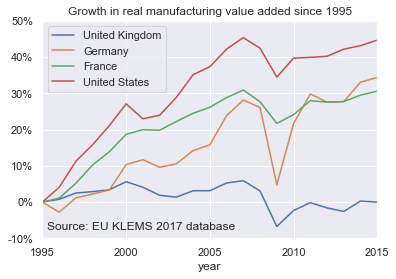

In [30]:
np.log(table.loc['UK','value']/table.loc[('UK',1995),'value']).plot(label='United Kingdom')
np.log(table.loc['DE','value']/table.loc[('DE',1995),'value']).plot(label='Germany')
np.log(table.loc['FR','value']/table.loc[('FR',1995),'value']).plot(label='France')
np.log(table.loc['US','value']/table.loc[('US',1995),'value']).plot(label='United States')
plt.axis([1995,2015,-0.1,0.5])
plt.legend()
plt.title('Growth in real manufacturing value added since 1995')
plt.yticks(np.arange(-0.1,0.6,0.1),['{}%'.format(i) for i in np.arange(-10,60,10)])
plt.xticks(np.arange(1995,2020,5))
plt.text(1995.25,-0.075,'Source: EU KLEMS 2017 database')
plt.savefig('manufacturing_va.png',dpi=200)